In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import torch 
import torchvision

%matplotlib inline 

## Data Preparation 
> In this case the data was already preprocessed 

In [47]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    
])

train_data = torchvision.datasets.Food101(
                                        root = "data" ,
                                        split = "train" , 
                                        transform= train_transform ,
                                        download=False 
                                        )
test_data = torchvision.datasets.Food101(
                                        root = "data" ,
                                        split = "test" , 
                                        transform= train_transform ,
                                        download=False 
                                        )



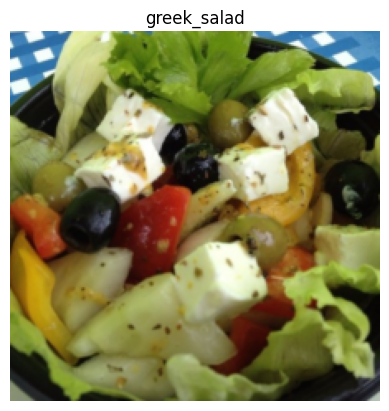

In [64]:
import random
random.seed(41
            )
img , label = train_data[random.randint(1,10000)]
import matplotlib.pyplot as plt

classes = train_data.classes

img = img.detach().cpu()   # remove grad + move to cpu
img = img.permute(1, 2, 0)          # (H, W, C)

plt.imshow(img)
plt.axis("off")
plt.title(f"{classes[label]}")
plt.show()


In [4]:
from collections import Counter

print(f"Train data value counts of each label : \n{dict(Counter(train_data._labels))}")
print(f"Test data value counts of each label : \n{dict(Counter(test_data._labels))}")


Train data value counts of each label : 
{23: 750, 54: 750, 85: 750, 86: 750, 77: 750, 92: 750, 73: 750, 4: 750, 48: 750, 39: 750, 96: 750, 70: 750, 78: 750, 81: 750, 80: 750, 7: 750, 6: 750, 0: 750, 26: 750, 84: 750, 71: 750, 93: 750, 1: 750, 64: 750, 45: 750, 25: 750, 14: 750, 36: 750, 8: 750, 20: 750, 47: 750, 13: 750, 27: 750, 35: 750, 21: 750, 98: 750, 90: 750, 65: 750, 87: 750, 2: 750, 33: 750, 62: 750, 72: 750, 46: 750, 5: 750, 68: 750, 83: 750, 50: 750, 18: 750, 30: 750, 11: 750, 57: 750, 38: 750, 59: 750, 74: 750, 51: 750, 94: 750, 24: 750, 28: 750, 41: 750, 3: 750, 44: 750, 31: 750, 52: 750, 82: 750, 43: 750, 91: 750, 42: 750, 60: 750, 15: 750, 10: 750, 40: 750, 89: 750, 37: 750, 53: 750, 32: 750, 99: 750, 95: 750, 16: 750, 34: 750, 29: 750, 97: 750, 22: 750, 9: 750, 55: 750, 63: 750, 100: 750, 88: 750, 12: 750, 56: 750, 76: 750, 19: 750, 75: 750, 79: 750, 17: 750, 58: 750, 67: 750, 49: 750, 61: 750, 66: 750, 69: 750}
Test data value counts of each label : 
{23: 250, 54: 250,

## Loading the model from torchvision

In [5]:
model = torchvision.models.resnet50(weights="IMAGENET1K_V2")

In [6]:
## Freezing all the pretrained layers 
for param in model.parameters() :
    param.requires_grad = False

In [7]:
## Replace the model classifier head 
num_classes = 101

model.fc = torch.nn.Linear(model.fc.in_features , num_classes)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
def Train_loop(model , data_loader , accuracy_fn , optimizer , loss_fn , device) :
    model.to(device)
    model.train()
    for image , label in data_loader :
        image , label  = image.to(device) , label.to(device)
        preds = model(image)
        loss = loss_fn(preds , label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def Test_loop(model , data_loader , accuracy_fn , loss_fn , epoch , device) :
    model.eval() 
    test_loss = 0.00
    test_acc = 0.00
    with torch.inference_mode() :
        for X , y in data_loader :
            X , y = X.to(device) , y.to(device)
            preds = model(X) 
            loss += loss_fn(preds , y).items()
            acc += accuracy_fn(preds.argmax(dim=1) , y).items()

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Epoch : {epoch} | Test loss : {test_loss} | Test Acc : {test_acc}")





In [10]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset=train_data ,
                               batch_size=32 , 
                               shuffle= True)

test_data_loader = DataLoader(dataset=test_data ,
                               batch_size=32 , 
                               shuffle= False)

In [66]:
len(train_data_loader)

2368

In [11]:
x , y =test_data[4]
x.shape

torch.Size([3, 512, 512])